# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[23 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

from sklearn.decomposition import PCA





In [3]:
df = pd.read_csv('creditcard.csv')
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.shape

(284807, 31)

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [10]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

Data Scalling

In [15]:
X = df.drop(columns="Class", axis=1)
y = df['Class']

In [19]:
scaler = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Isolation Forest

In [54]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

isolation_forest.fit(X_train_scaled)
iso_y_pred_test = isolation_forest.predict(X_test_scaled)

iso_preds_for_test = [1 if x == -1 else 0 for x in iso_y_pred_test]

n_anomalies_in_test_data = np.sum(iso_preds_for_test)

print("Number of annomalies in test data is - ", n_anomalies_in_test_data)

print("Classification report")
print(classification_report(y_test, iso_preds_for_test))


Number of annomalies in test data is -  2804
Classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56656
           1       0.03      0.79      0.05        90

    accuracy                           0.95     56746
   macro avg       0.51      0.87      0.51     56746
weighted avg       1.00      0.95      0.97     56746



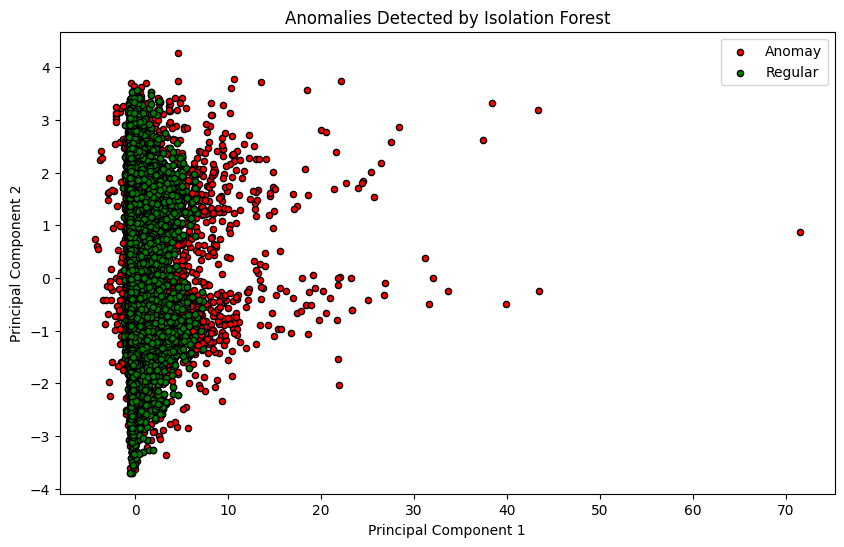

In [69]:
pca = PCA(n_components=2)

def plot_detected_anomalies(X_test, x_predict, y_test, name):
    X_pca = pca.fit_transform(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[y_test == 0, 0], X_pca[y_test == 0, 1], c='red', label="Anomay", edgecolor='k', s=20)
    plt.scatter(X_pca[x_predict == 1, 0], X_pca[x_predict == 1, 1], c='green', label="Regular", edgecolor='k', s=20)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"Anomalies Detected by {name}")
    plt.legend()
    plt.show()
    
plot_detected_anomalies(X_test_scaled,iso_y_pred_test, y_test, "Isolation Forest" )


OneClassSVM

In [33]:
one_classs_svm = OneClassSVM(gamma='auto', kernel='rbf', nu=0.05 )

one_classs_svm.fit(X_train_scaled)

onc_svm_y_pred_test = one_classs_svm.predict(X_test_scaled)

onc_svm_preds_for_test = [1 if x == -1 else 0 for x in onc_svm_y_pred_test]

n_anomalies_in_test_data = np.sum(onc_svm_preds_for_test)

print("Number of annomalies in test data is - ", n_anomalies_in_test_data)

print("Classification report")
print(classification_report(y_test, onc_svm_preds_for_test))



Number of annomalies in test data is -  2810
Classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56656
           1       0.03      0.83      0.05        90

    accuracy                           0.95     56746
   macro avg       0.51      0.89      0.51     56746
weighted avg       1.00      0.95      0.97     56746



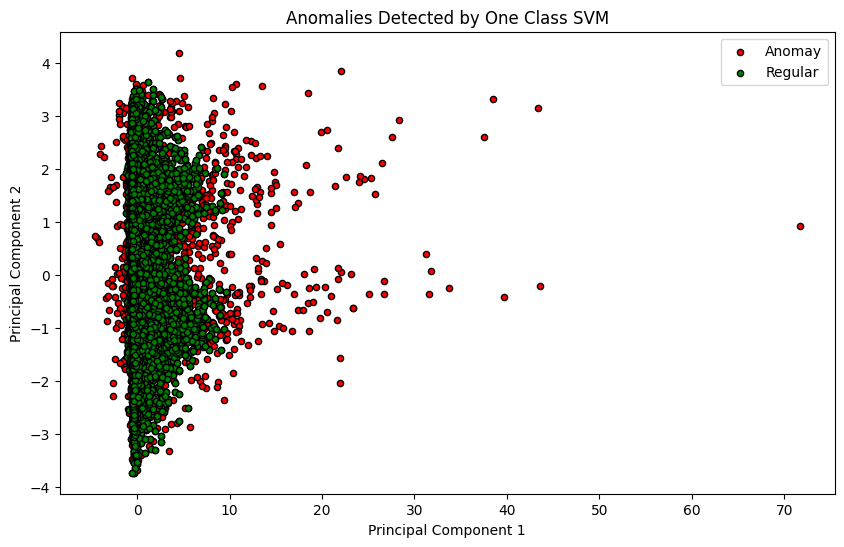

In [70]:
plot_detected_anomalies(X_test_scaled, onc_svm_y_pred_test, y_test, "One Class SVM" )


LocalOutlierFactor


In [36]:
local_outlier = LocalOutlierFactor(contamination=0.05, n_neighbors=20)

local_outlier.fit(X_train_scaled)

lof_y_pred_test = local_outlier.fit_predict(X_test_scaled)

lof_preds_for_test = [1 if x == -1 else 0 for x in lof_y_pred_test]

n_anomalies_in_test_data = np.sum(onc_svm_preds_for_test)

print("Number of annomalies in test data is - ", n_anomalies_in_test_data)

print("Classification report")
print(classification_report(y_test, lof_preds_for_test))


Number of annomalies in test data is -  2810
Classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56656
           1       0.00      0.14      0.01        90

    accuracy                           0.95     56746
   macro avg       0.50      0.55      0.49     56746
weighted avg       1.00      0.95      0.97     56746



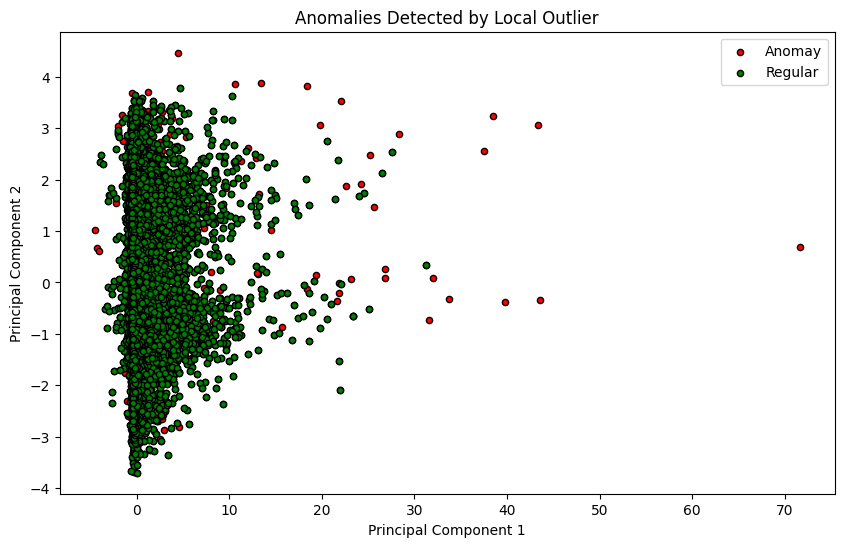

In [72]:
plot_detected_anomalies(X_test_scaled, lof_y_pred_test, y_test, "Local Outlier" )


AutoEncoder


In [48]:
losses = []


class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4)
        )

        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = X_train.shape[1]
autoencoder = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)

num_epochs = 20
for epoch in range(num_epochs):
    autoencoder.train()
    outputs = autoencoder(X_train_tensor)
    loss = criterion(outputs, X_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

autoencoder.eval()
with torch.no_grad():
    reconstructed = autoencoder(X_test_tensor)
    reconstruction_error = torch.mean((reconstructed - X_test_tensor) ** 2, axis=1).numpy()

threshold = np.percentile(reconstruction_error, 99)
y_pred_ae = [1 if error > threshold else 0 for error in reconstruction_error]

print(classification_report(y_test, y_pred_ae, target_names=['Normal', 'Anomaly']))


Epoch [1/20], Loss: 1.0298
Epoch [2/20], Loss: 1.0284
Epoch [3/20], Loss: 1.0272
Epoch [4/20], Loss: 1.0259
Epoch [5/20], Loss: 1.0248
Epoch [6/20], Loss: 1.0236
Epoch [7/20], Loss: 1.0225
Epoch [8/20], Loss: 1.0215
Epoch [9/20], Loss: 1.0205
Epoch [10/20], Loss: 1.0195
Epoch [11/20], Loss: 1.0185
Epoch [12/20], Loss: 1.0176
Epoch [13/20], Loss: 1.0167
Epoch [14/20], Loss: 1.0158
Epoch [15/20], Loss: 1.0150
Epoch [16/20], Loss: 1.0142
Epoch [17/20], Loss: 1.0134
Epoch [18/20], Loss: 1.0126
Epoch [19/20], Loss: 1.0118
Epoch [20/20], Loss: 1.0111
              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00     56656
     Anomaly       0.08      0.53      0.15        90

    accuracy                           0.99     56746
   macro avg       0.54      0.76      0.57     56746
weighted avg       1.00      0.99      0.99     56746



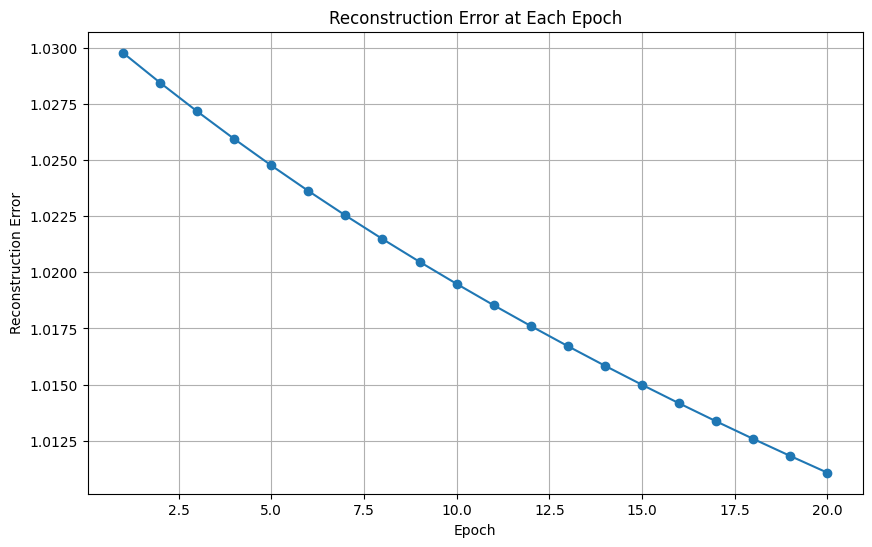

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error at Each Epoch")
plt.grid(True)
plt.show()

Щоб виявити підозрілі операції (аномалії) ми використали кілька різних моделей машинного навчання:

Isolation Forest: Ця модель добре справляється з виявленням очевидних аномалій, коли шахрайські операції сильно відрізняються від нормальних.

One Class SVM: Ця модель також непогана, але може мати проблеми з великими наборами даних або коли в даних багато різних типів інформації. Крім того, вона вимагає більше обчислювальних ресурсів.

LocalOutlierFactor: Ця модель добре знаходить аномалії, які відрізняються від своїх сусідів. Однак, вона може давати не зовсім точні результати, коли в даних дуже багато різних ознак.

Автоенкодер: Це нейронна мережа, яка вчиться відтворювати вхідні дані. Вона показала дуже добрі результати, особливо коли дані мають складну структуру. Автоенкодери можуть знаходити приховані закономірності в даних, які інші моделі можуть пропустити. 
Хоча автоенкодери вимагають більше обчислень, вони можуть працювати з великими обсягами інформації. 
З усіх перевірених моделей, автоенкодер показав найкращі результати (точність 0.99). Це означає, що він найбільш точно виявляє аномалії.

Ми шукали спосіб відрізнити справжні покупки по картці від шахрайських. Для цього ми використали кілька різних інструментів машинного навчання. Найкраще з цим завданням справилася модель під назвою "автоенкодер". 